In [142]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import src.lstm_helper as lh
import src.time_series_helpers as th

### compairson by total

In [47]:
ls data/

LSTM_10_output_forecast.csv  sample_submission.csv
LSTM_500_by_item.csv         sample_valid.csv
LSTM_500_forecast.csv        store_item.csv
VAR_by_item.csv              test.csv
VAR_forecast.csv             train.csv
lstm_10_by_item.csv          vcr_by_item.csv
lstm_data.csv                vcr_forecast.csv
processed_train.csv


In [48]:
# load sample valid dataset
valid_path ='data/sample_valid.csv'
valid = lh.load_data(valid_path)

# load Forecasting
VAR_path = 'data/VAR_forecast.csv'
VAR_forcast=lh.load_data(VAR_path)

LSTM_500_output_path= 'data/LSTM_500_forecast.csv'
LSTM_500_output_forecast=lh.load_data(LSTM_500_output_path)

LSTM_10_output_path = 'data/LSTM_10_output_forecast.csv'
LSTM_10_output_forecast=lh.load_data(LSTM_10_output_path)

valid.shape

(46000, 3)

In [49]:
df_comp = pd.concat([valid,VAR_forcast,LSTM_500_output_forecast, LSTM_10_output_forecast], axis = 'columns')

In [50]:
df_comp.shape

(46000, 6)

In [51]:
df_comp.head()

,store,item,actuals,VAR_forecast,LSTM_500_output_forecast,LSTM_10_output_forecast
date,,,,,,
2017-10-01,1,1,21,28.298917,19.159014,21.983830
2017-10-02,1,1,12,17.481383,19.159014,21.253641
2017-10-03,1,1,18,21.455338,19.159014,19.590227
2017-10-04,1,1,15,22.685883,19.159014,20.462664
2017-10-05,1,1,20,22.080135,19.159014,20.195715


In [52]:
#drop store, item id 
comp_data = df_comp.iloc[:,2:]
comp_data.head()

,actuals,VAR_forecast,LSTM_500_output_forecast,LSTM_10_output_forecast
date,,,,
2017-10-01,21,28.298917,19.159014,21.983830
2017-10-02,12,17.481383,19.159014,21.253641
2017-10-03,18,21.455338,19.159014,19.590227
2017-10-04,15,22.685883,19.159014,20.462664
2017-10-05,20,22.080135,19.159014,20.195715


In [53]:
#calculate the RMSE by model
df_rmses =th.rmse_comp(comp_data)

In [54]:
df_rmses

,names,RMSE_or_mean
0,actuals_mean,54.677543
1,LSTM_500_output_forecast,35.250000
2,LSTM_10_output_forecast,35.170000
3,VAR_forecast,35.000000


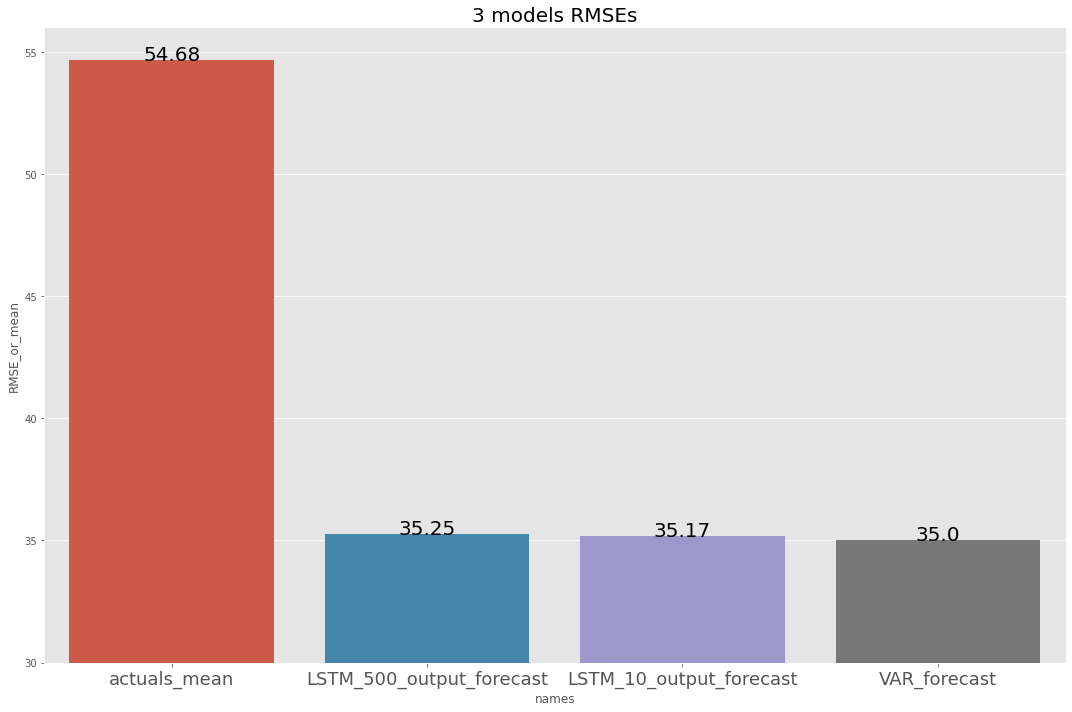

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data=df_rmses,x="names", y="RMSE_or_mean")
ax.set_ylim(30,56)
ax.set_title('3 models RMSEs',fontsize=20)
for index, row in df_rmses.iterrows():
    ax.text(row.name,row.RMSE_or_mean, round(row.RMSE_or_mean,2), color='black', ha="center",fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tight_layout()
plt.savefig('images/3_models_RMSEs.png')

### comparison by store-item

In [56]:
!ls data/

LSTM_10_output_forecast.csv sample_submission.csv
LSTM_500_by_item.csv        sample_valid.csv
LSTM_500_forecast.csv       store_item.csv
VAR_by_item.csv             test.csv
VAR_forecast.csv            train.csv
lstm_10_by_item.csv         vcr_by_item.csv
lstm_data.csv               vcr_forecast.csv
processed_train.csv


In [130]:
# load sample valid dataset
valid_path ='data/store_item.csv'
valid_item = lh.load_data(valid_path)
valid_item=valid_item[-92:]

# load Forecasting
VAR_path = 'data/VAR_by_item.csv'
VAR_item=lh.load_data(VAR_path)


LSTM_500_output_path= 'data/LSTM_500_by_item.csv'
LSTM_500_item=lh.load_data(LSTM_500_output_path)

LSTM_10_output_path = 'data/lstm_10_by_item.csv'
LSTM_10_item=lh.load_data(LSTM_10_output_path)


In [131]:
df_lst =[valid_item,LSTM_500_item,LSTM_10_item,VAR_item]
for i in df_lst:
    print(i.shape)

(92, 500)
(92, 500)
(92, 500)
(92, 500)


In [132]:
valid_item=valid_item[-92:]


In [133]:
valid_item.head()

,s1_i1,s1_i2,s1_i3,s1_i4,s1_i5,s1_i6,s1_i7,s1_i8,s1_i9,s1_i10,...,s10_i41,s10_i42,s10_i43,s10_i44,s10_i45,s10_i46,s10_i47,s10_i48,s10_i49,s10_i50
date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,21,60,38,22,20,70,70,100,63,88,...,22,51,71,39,122,67,33,75,39,99
2017-10-02,12,56,32,21,15,40,44,64,39,73,...,27,38,50,35,62,51,18,48,32,71
2017-10-03,18,55,28,17,22,58,51,57,51,84,...,20,35,54,35,87,49,27,70,20,77
2017-10-04,15,55,34,24,15,61,55,61,39,62,...,27,38,56,33,106,65,26,74,39,87
2017-10-05,20,59,40,25,19,52,47,69,41,60,...,28,51,72,47,103,72,25,61,31,78


In [134]:
LSTM_500_item.head()

,s1_i1_forecast,s1_i2_forecast,s1_i3_forecast,s1_i4_forecast,s1_i5_forecast,s1_i6_forecast,s1_i7_forecast,s1_i8_forecast,s1_i9_forecast,s1_i10_forecast,...,s10_i41_forecast,s10_i42_forecast,s10_i43_forecast,s10_i44_forecast,s10_i45_forecast,s10_i46_forecast,s10_i47_forecast,s10_i48_forecast,s10_i49_forecast,s10_i50_forecast
date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-02,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-03,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-04,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846
2017-10-05,19.159014,52.580864,35.3575,22.567305,16.82295,55.634895,53.077362,70.63362,47.75663,68.64885,...,27.451183,43.18299,60.896748,36.195072,92.7764,67.45352,26.126656,59.192154,34.83941,74.65846


In [143]:
comp_df_lts=[VAR_item,LSTM_10_item,LSTM_500_item,valid_item]

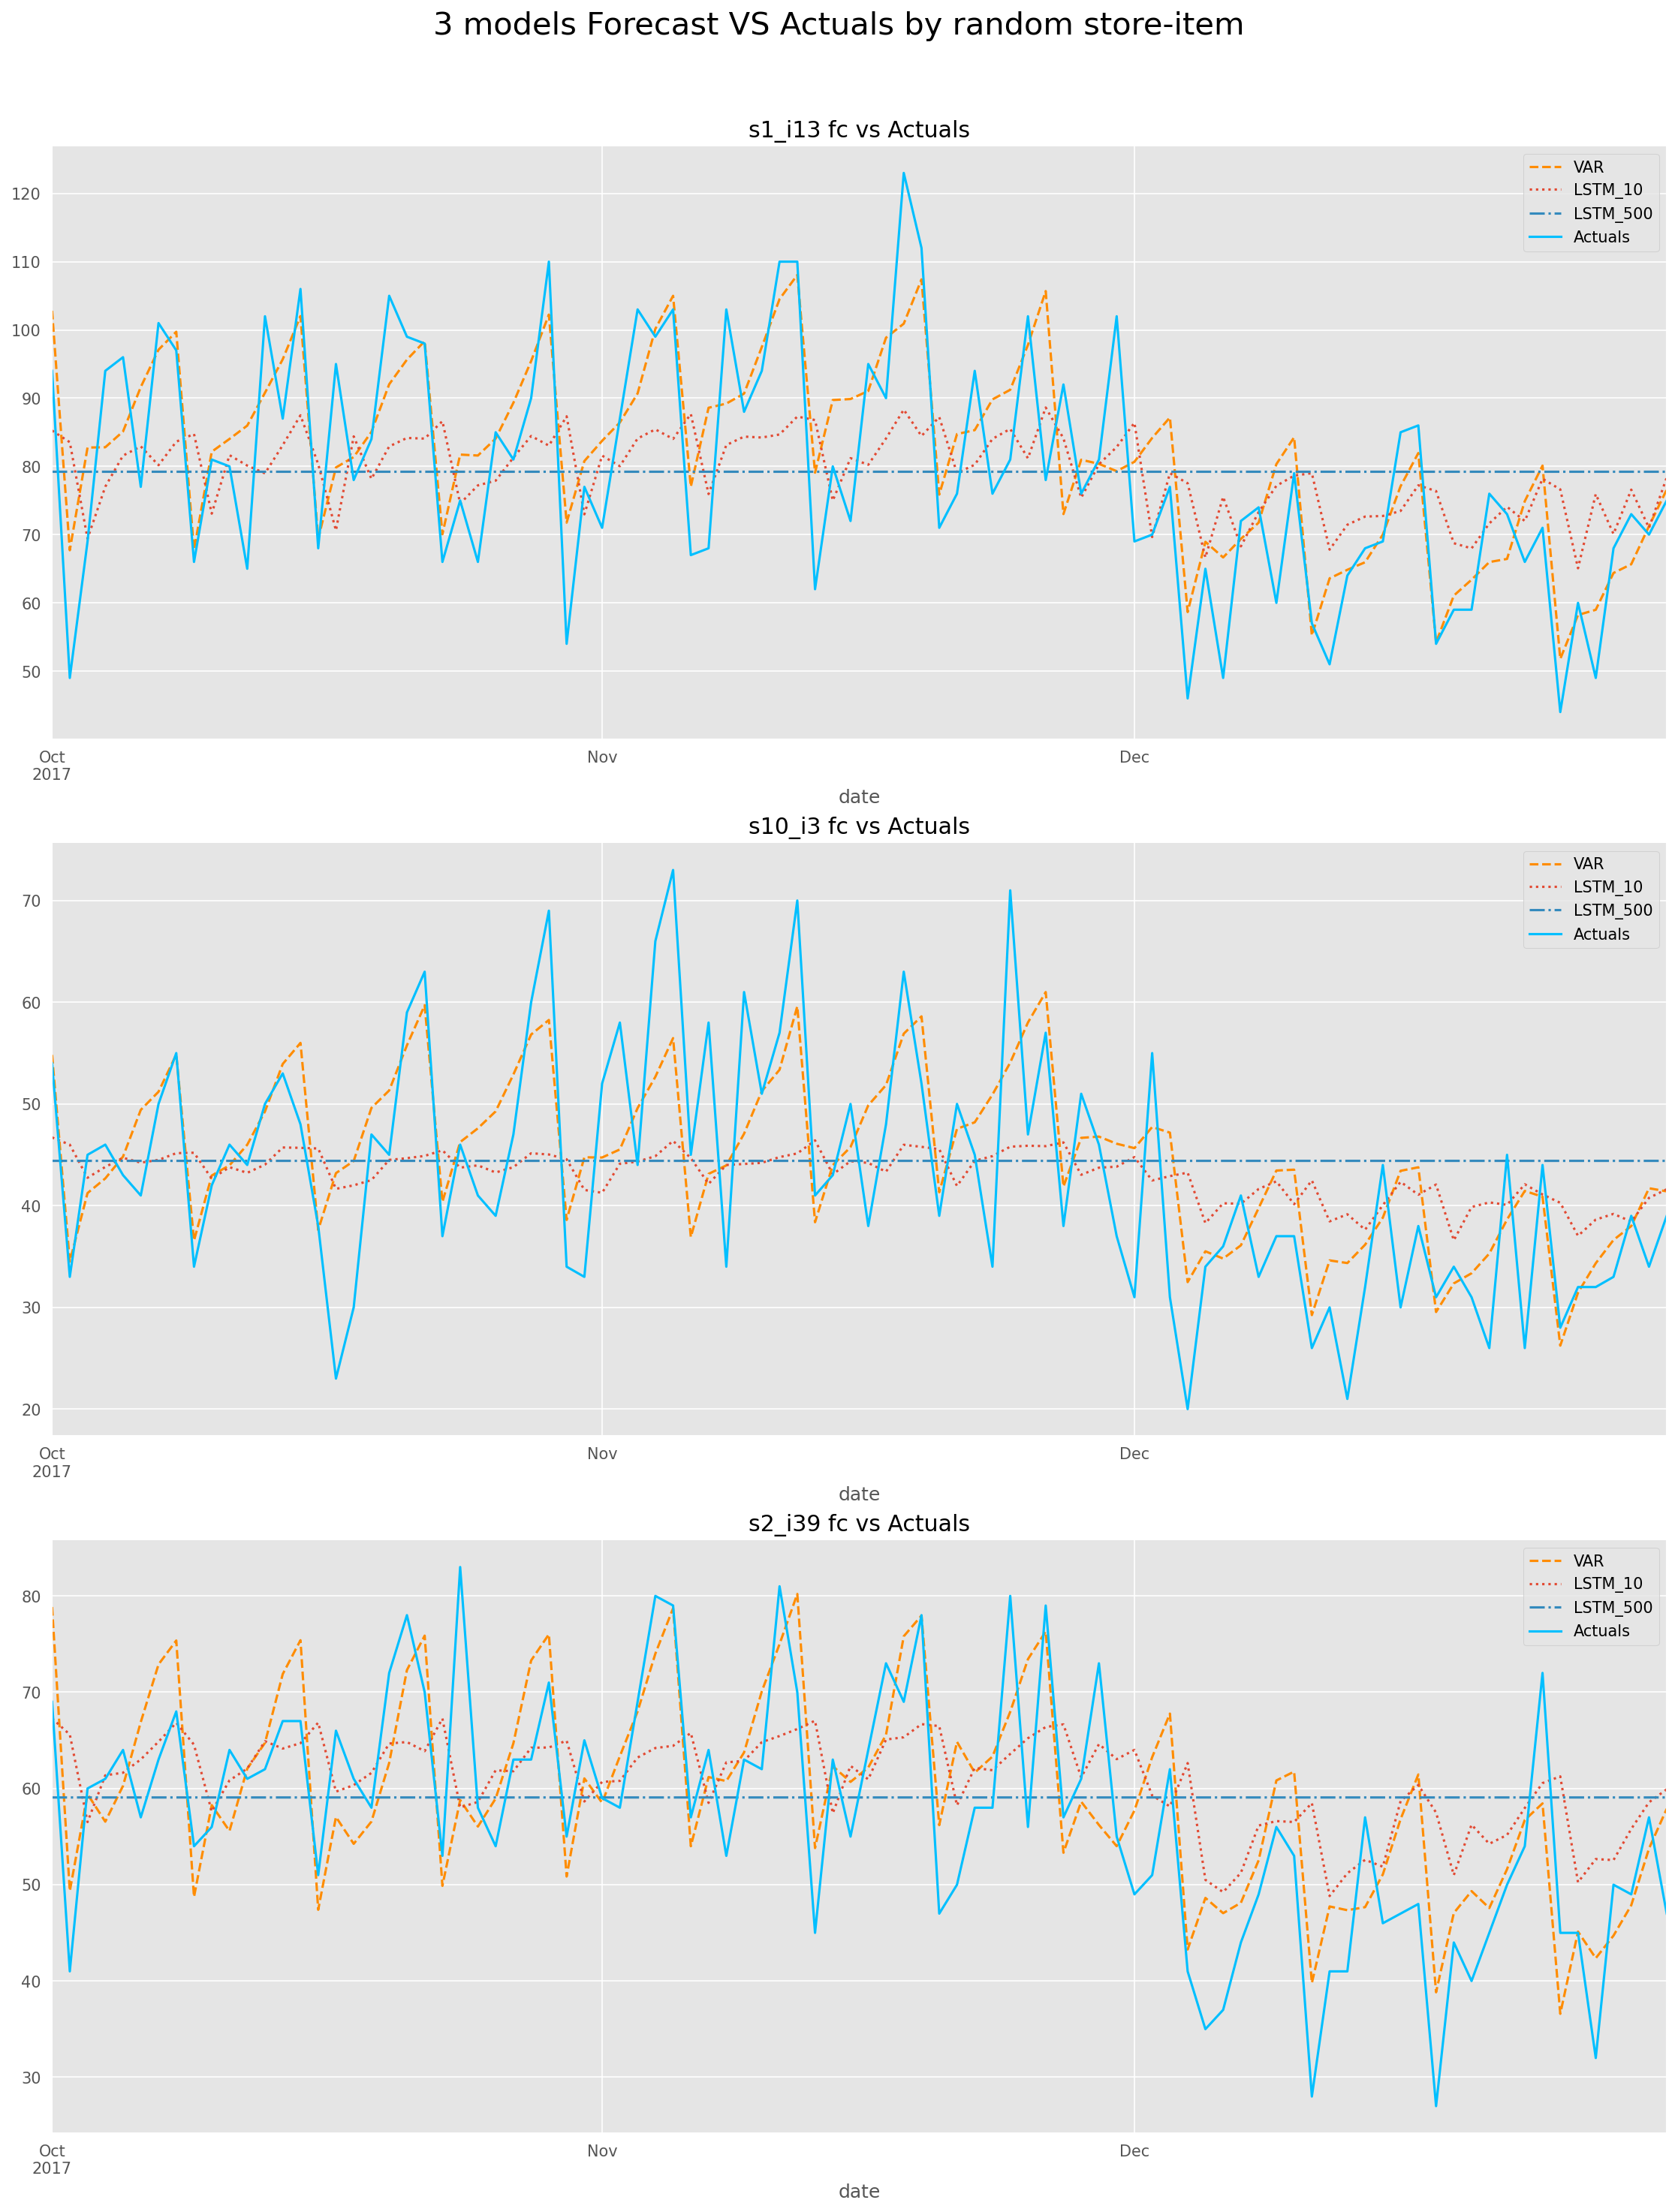

Plot saved.


In [149]:
figtitle="3 models Forecast VS Actuals by random store-item"
th.plot_forecasr_multiple(comp_df_lts,figtitle,num_rows=3)